In [109]:
import pandas as pd
import time
import datetime
import seaborn as sns

### Load recipe

In [99]:
df_recipe = pd.read_csv('hrv_recipe.csv')
cols = ['name', 'channel', 'CT start', 'CT finish']
df_recipe = df_recipe[cols].drop_duplicates()
df_recipe

,name,channel,CT start,CT finish
0,GA-2023-07-05,5,19.5,0.5
2,GA-2023-06-07,5,14.5,19.5
3,GA-2023-06-07,8,14.7,19.7
6,GA-2023-05-23,5,8.0,13.0
7,GA-2023-05-23,8,7.0,12.0
10,GA-2023-05-09,5,10.5,15.5
11,GA-2023-05-09,8,9.0,14.0
28,GA-2022-12-19,2,3.0,6.5
30,GA-2023-01-16,2,7.5,12.5
32,GA-2023-02-08,2,5.5,10.5


### Loading the extracted frequency domain data

In [100]:
rfd = pd.read_csv('frequency-domain-results-2023-10-01 13:20:18.851508.csv')
rfd

,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_TP,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF,category,name,set,channel
0,NaN,0.035118,0.013715,0.001682,9.784525e-08,0.050515,8.156542,0.271508,0.033287,-6.388069,before_GA,GA-2022-12-19,offset,2
1,NaN,0.043981,0.028995,0.006752,4.084671e-07,0.079729,4.294512,0.363676,0.084684,-4.997956,before_GA,GA-2022-12-19,offset,2
2,NaN,0.032517,0.023450,0.003386,3.421688e-07,0.059354,6.925698,0.395093,0.057047,-5.688109,before_GA,GA-2022-12-19,offset,2
3,NaN,0.025047,0.013537,0.005404,3.735436e-07,0.043988,2.505036,0.307737,0.122847,-5.220660,before_GA,GA-2022-12-19,offset,2
4,NaN,0.013133,0.016393,0.004526,1.463160e-07,0.034052,3.621797,0.481399,0.132917,-5.397889,before_GA,GA-2022-12-19,offset,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,NaN,0.009518,0.007643,0.003499,1.449087e-05,0.020674,2.184029,0.369669,0.169260,-5.655198,during_GA,GA-2023-07-05,during_GA,5
242,NaN,0.004837,0.007552,0.001525,4.483509e-06,0.013919,4.952081,0.542577,0.109565,-6.485736,during_GA,GA-2023-07-05,during_GA,5
243,NaN,0.031470,0.021726,0.012616,2.183152e-07,0.065812,1.722071,0.330122,0.191700,-4.372773,during_GA,GA-2023-07-05,during_GA,5
244,NaN,0.009390,0.010242,0.001836,4.165680e-06,0.021472,5.579029,0.476987,0.085496,-6.300269,during_GA,GA-2023-07-05,during_GA,5


In [101]:
df_freq_domain = pd.merge(rfd, df_recipe, left_on=["name", "channel"], right_on=["name", "channel"])
df_freq_domain['set'] = df_freq_domain['set']+ ' + ' + df_freq_domain['category']
df_freq_domain['CT'] = df_freq_domain['CT start'].apply(str) + ' to ' + df_freq_domain['CT finish'].apply(str)
def get_mouse(x):
    if x==2:
        return '1'
    elif x==5:
        return '4'
    return '5'
df_freq_domain['mouse'] = df_freq_domain['channel'].apply(lambda x :get_mouse(x))
df_freq_domain

,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_TP,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF,category,name,set,channel,CT start,CT finish,CT,mouse
0,NaN,0.035118,0.013715,0.001682,9.784525e-08,0.050515,8.156542,0.271508,0.033287,-6.388069,before_GA,GA-2022-12-19,offset + before_GA,2,3.0,6.5,3.0 to 6.5,1
1,NaN,0.043981,0.028995,0.006752,4.084671e-07,0.079729,4.294512,0.363676,0.084684,-4.997956,before_GA,GA-2022-12-19,offset + before_GA,2,3.0,6.5,3.0 to 6.5,1
2,NaN,0.032517,0.023450,0.003386,3.421688e-07,0.059354,6.925698,0.395093,0.057047,-5.688109,before_GA,GA-2022-12-19,offset + before_GA,2,3.0,6.5,3.0 to 6.5,1
3,NaN,0.025047,0.013537,0.005404,3.735436e-07,0.043988,2.505036,0.307737,0.122847,-5.220660,before_GA,GA-2022-12-19,offset + before_GA,2,3.0,6.5,3.0 to 6.5,1
4,NaN,0.013133,0.016393,0.004526,1.463160e-07,0.034052,3.621797,0.481399,0.132917,-5.397889,before_GA,GA-2022-12-19,offset + before_GA,2,3.0,6.5,3.0 to 6.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,NaN,0.009518,0.007643,0.003499,1.449087e-05,0.020674,2.184029,0.369669,0.169260,-5.655198,during_GA,GA-2023-07-05,during_GA + during_GA,5,19.5,0.5,19.5 to 0.5,4
242,NaN,0.004837,0.007552,0.001525,4.483509e-06,0.013919,4.952081,0.542577,0.109565,-6.485736,during_GA,GA-2023-07-05,during_GA + during_GA,5,19.5,0.5,19.5 to 0.5,4
243,NaN,0.031470,0.021726,0.012616,2.183152e-07,0.065812,1.722071,0.330122,0.191700,-4.372773,during_GA,GA-2023-07-05,during_GA + during_GA,5,19.5,0.5,19.5 to 0.5,4
244,NaN,0.009390,0.010242,0.001836,4.165680e-06,0.021472,5.579029,0.476987,0.085496,-6.300269,during_GA,GA-2023-07-05,during_GA + during_GA,5,19.5,0.5,19.5 to 0.5,4


In [135]:

df = df_freq_domain[['HRV_LF', 'HRV_HF', 'set', 'mouse', 'CT', 'CT start']]
df['LF:HF'] = df['HRV_LF'] / df['HRV_HF']
df = df.groupby(['set', 'mouse', 'CT', 'CT start'])[['HRV_LF', 'HRV_HF', 'LF:HF']].mean().reset_index()

/var/folders/zz/mk7_vrcn3r3gsbwr585w4blxzyk8xb/T/ipykernel_68644/3951557362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LF:HF'] = df['HRV_LF'] / df['HRV_HF']


In [137]:
df = df.sort_values(['mouse', 'CT start'])
df

,set,mouse,CT,CT start,HRV_LF,HRV_HF,LF:HF
1,offset + after_GA,1,3.0 to 6.5,3.0,0.038746,0.026496,1.519175
11,offset + before_GA,1,3.0 to 6.5,3.0,0.035732,0.022407,4.425560
21,onset + after_GA,1,3.0 to 6.5,3.0,0.029780,0.022995,1.865475
31,onset + before_GA,1,3.0 to 6.5,3.0,0.057076,0.072979,1.429280
2,offset + after_GA,1,5.5 to 10.5,5.5,0.024796,0.017744,2.439285
12,offset + before_GA,1,5.5 to 10.5,5.5,0.049659,0.019206,2.824810
22,onset + after_GA,1,5.5 to 10.5,5.5,0.028398,0.024355,1.791929
32,onset + before_GA,1,5.5 to 10.5,5.5,0.083930,0.113839,0.883913
3,offset + after_GA,1,7.5 to 12.5,7.5,0.077379,0.031853,2.937428
13,offset + before_GA,1,7.5 to 12.5,7.5,0.027129,0.010282,3.037279


## Analysis 

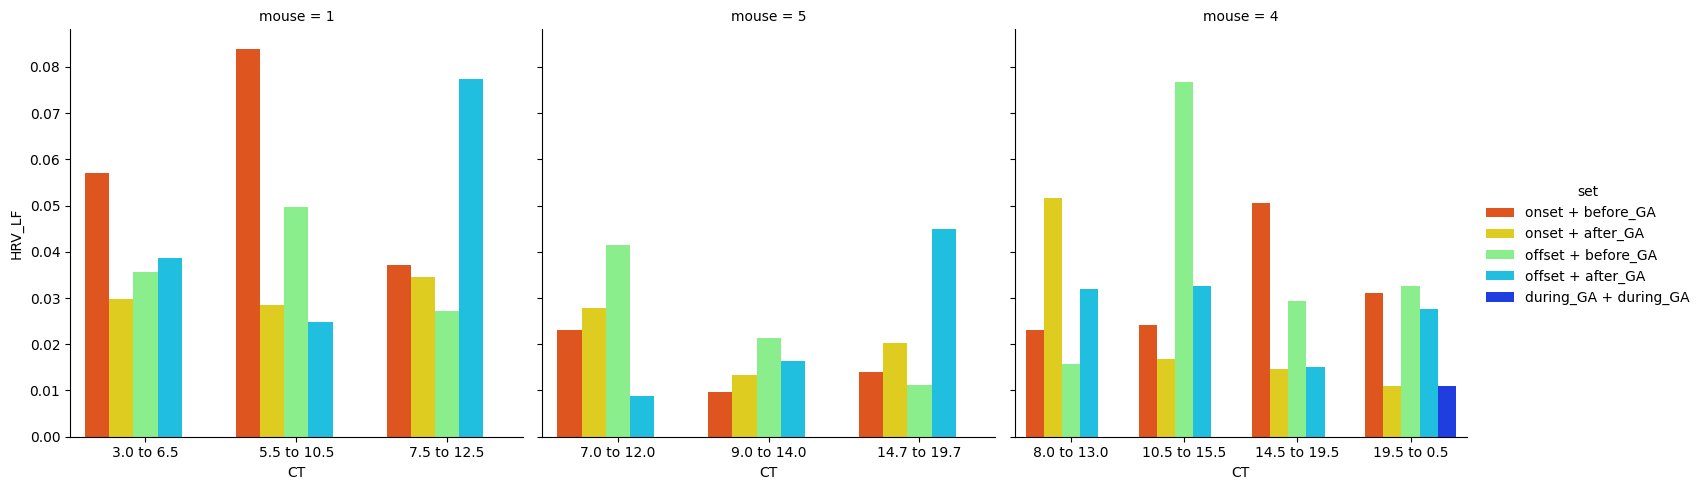

In [138]:
hue_order = ['onset + before_GA', 'onset + after_GA', 'offset + before_GA', 'offset + after_GA', 'during_GA + during_GA']
col_order = ['1','5','4']
palette = 'Blues_d'
palette = 'jet_r'
sns.catplot(x="CT", y="HRV_LF", hue="set", col="mouse", data=df, kind="bar", sharex=False, palette=palette, hue_order=hue_order, col_order=col_order)


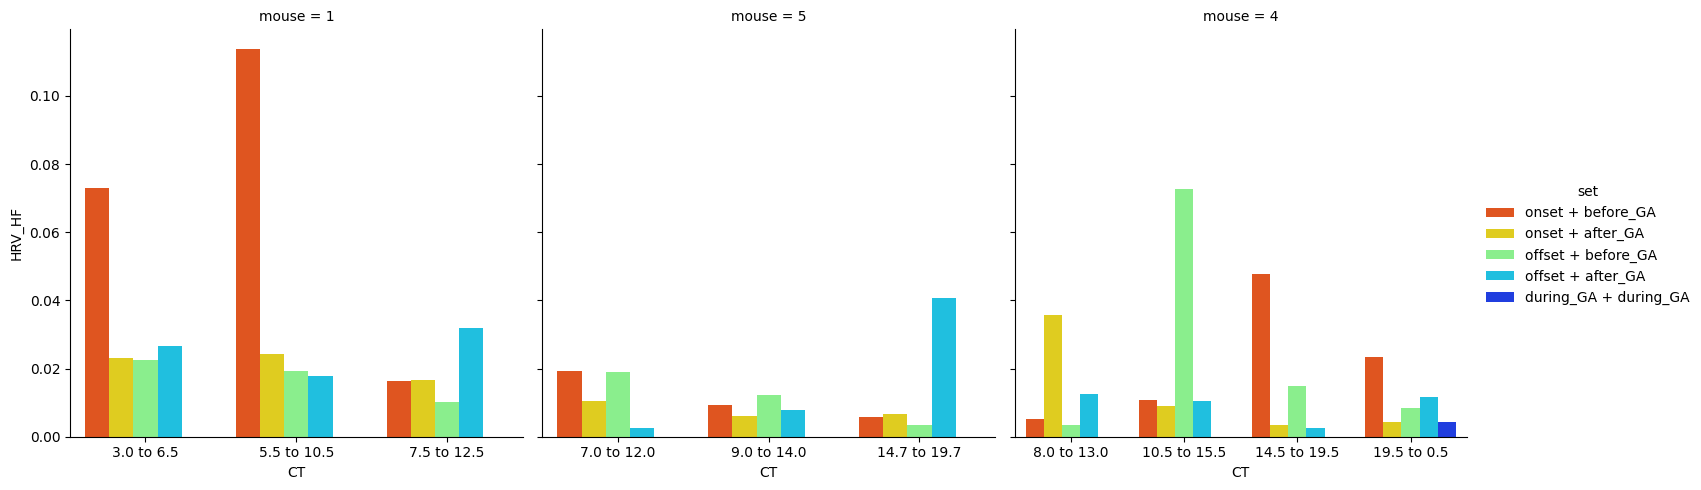

In [141]:
sns.catplot(x="CT", y="HRV_HF", hue="set", col="mouse", data=df, kind="bar", sharex=False, palette=palette, hue_order=order, col_order=['1','5','4'])

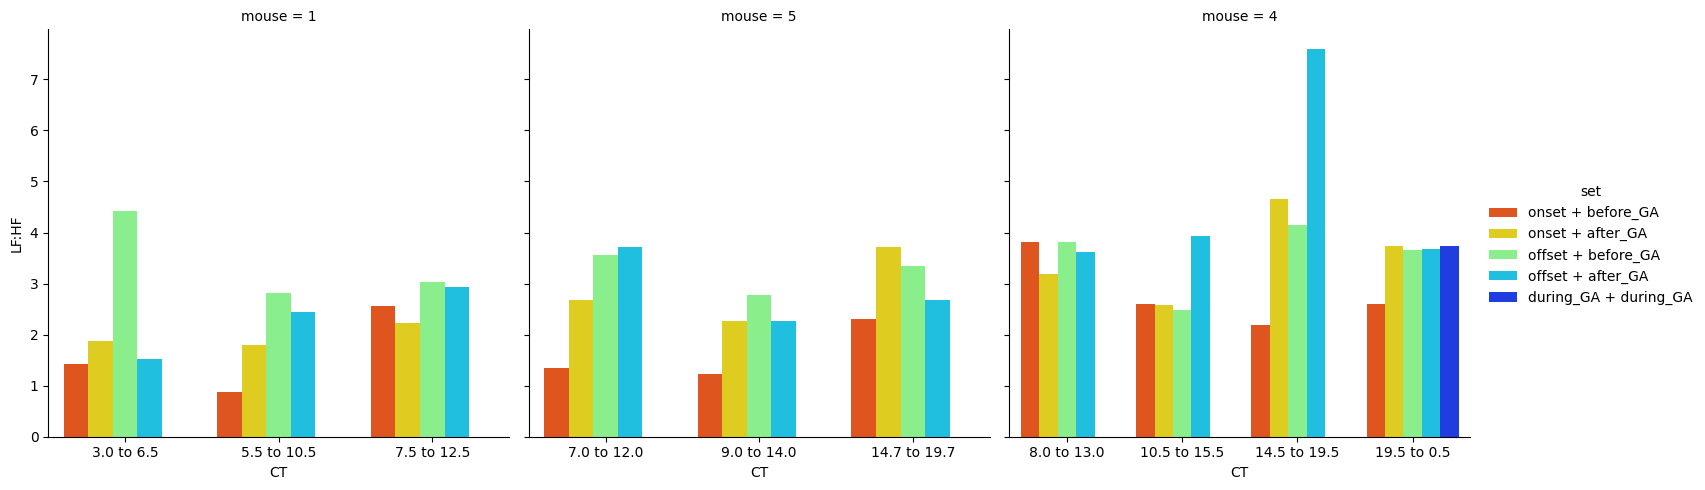

In [140]:
sns.catplot(x="CT", y="LF:HF", hue="set", col="mouse", data=df, kind="bar", sharex=False, palette=palette, hue_order=order, col_order=['1','5','4'])